<a href="https://colab.research.google.com/github/limjustin/do_it_deep_learning/blob/master/Chapter04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##04-1. 초기 인공지능 알고리즘과 로지스틱 회귀

#### 퍼셉트론에 대해 알아보기
**이진 분류(binary classification)**
- 임의의 샘플 데이터를 True나 False로 구분하는 문제

**퍼셉트론(Perceptron) 알고리즘**
- 직선 방정식을 사용함(w1x1 + w2x2 + b = z) -> 선형 함수
- 마지막 단계에서, 샘플을 이진 분류하기 위하여 계단 함수(step function)를 사용
- 계단 함수를 통과한 값을 다시 가중치와 절편을 업데이트(학습)하는데 사용 -> 계단 함수의 결과를 학습에 사용
- 계단 함수 : z가 0보다 크거나 같으면 1(양성 클래스), 0보다 작으면 -1(음성 클래스)로 분류

####아달린에 대해 알아보기
**아달린(Adaline)**
- 퍼셉트론을 개선한 적응형 선형 뉴런(Adaptive Linear Neuron)
- 선형 함수의 결과를 학습에 사용 vs (퍼셉트론) 계단 함수의 결과를 학습에 사용
- 역방향 계산이 선형 함수 출력 이후에 진행 vs (퍼셉트론) 계단 함수 출력 이후에 진행

#### 로지스틱 회귀에 대해 알아보기
**로지스틱 회귀(logistic regression)**
- 아달린 + 활성화 함수
- 선형 함수와 임계 함수 사이에 활성화 함수가 존재
- 활성화 함수를 통과한 값은 a
- 로지스틱 회귀의 마지막 단계에서, 임계 함수를 사용하여 예측을 수행
- 임계 함수 : 계단 함수와 역할은 비슷, 단 활성화 함수의 출력값을 인풋값으로 한다는 것이 차이점 (원래 같으면 선형 함수의 출력값)

##04-2. 시그모이드 함수로 확률 만들기
**시그모이드 함수**
- 로지스틱 회귀에서 사용하는 활성화 함수
- z를 0~1 사이의 확률 값으로 변환시켜주는 역할
- **오즈 비(odds ratio)** : 성공 확률과 실패 확률의 비율을 나타냄
- **로짓 함수(logit function)** : 오즈 비에 로그 함수를 취해서 만든 함수

**로지스틱 회귀**
- 로지스틱 회귀의 목표 : 이진 분류
- 1. -∞ ~ ∞의 값을 가질 수 있는 z를 조절할 필요 있음
  2. 시그모이드 함수를 활성화 함수로 사용하여 0~1 사이의 값을 갖게 함
  3. 시그모이드 함수의 확률인 a를 0과 1로 구분하기 위해 임계 함수 사용
  4. 입력데이터가 0 또는 1의 값으로 나누어짐

## 04-3. 로지스틱 손실 함수를 경사 하강법에 적용하기
**목표**
- 선형 회귀의 목표 : 정답과 예상값의 오차 제곱이 최소가 되는 가중치와 절편을 찾는 것
- 로지스틱 회귀의 목표 : 올바르게 분류된 샘플 데이터의 비율 자체를 높이는 것
- 따라서, 가중치의 업데이트를 위해서 로지스틱 손실 함수가 필요

**로지스틱 손실 함수의 미분**
- 활성화 함수의 결과 값인 a의 값이 우리가 이상적으로 생각하는 값에 도달하게 하려면, 로지스틱 손실 함수의 값을 최소로 해야함
- 로지스틱 손실 함수의 미분을 통하여 로지스틱 손실 함수의 값을 최소로 하는 가중치와 절편을 찾을 수 있음
- 로지스틱 손실 함수를 가중치에 대하여 미분할 때 연쇄 법칙을 사용할 수 있음
- 결과 : 로지스틱 손실 함수의 미분 결과는 제곱 오차 손실 함수의 미분 결과와 동일

## 04-4. 분류용 데이터 세트를 준비
**유방암 데이터 세트 준비하기**


In [1]:
## 1. load_breast_cancer() 함수 호출하기

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

![datasetformat](https://user-images.githubusercontent.com/55044278/88146222-8cc14c80-cc36-11ea-9522-7e3b16d92f97.PNG)

In [2]:
## 2. 입력 데이터 확인하기

print(cancer.data.shape, cancer.target.shape) ## 569개의 샘플과 30개의 특성이 있음

(569, 30) (569,)


In [3]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

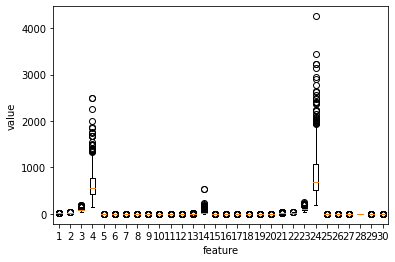

In [4]:
## 3. 박스 플롯으로 특성의 사분위 관찰하기

import matplotlib.pyplot as plt
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [5]:
## 4. 눈에 띄는 특성 살펴보기

cancer.feature_names[[3,13,23]] ## 모두 넓이와 관련된 특성들임

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [6]:
## 5. 타깃 데이터 확인하기

import numpy as np
np.unique(cancer.target, return_counts=True) ## cancer.target의 값은 0과 1만 들어있으며, 타깃 데이터의 고유한 값의 개수를 센 다음 반환한 것
                                             ## 212개의 음성 클래스(정상 종양)와 357개의 양성 클래스(악성 종양)

(array([0, 1]), array([212, 357]))

In [7]:
## 6. 훈련 데이터 세트 저장하기

x = cancer.data
y = cancer.target

## 04-5. 로지스틱 회귀를 위한 뉴런 만들기
**모델의 성능 평가를 위한 훈련 세트와 테스트 세트**
- 모델의 성능 평가가 필요한 이유 : 잘못된 결과를 초래할 수도 있고, 의미 없는 결과가 나올 수도 있음
- 좋은 성능이 나오기 위해서는, 모델을 학습시킨 훈련 데이터 세트로 다시 모델의 성능을 평가하면 됨 -> 훈련 데이터 세트를 두 덩어리로 분리

**훈련 데이터 세트를 훈련 세트와 테스트 세트로 나누는 규칙**
- 훈련 세트가 테스트 세트보다 더 많아야 함
- 양성, 음성 클래스가 훈련 세트나 테스트 세트의 어느 한쪽에 몰리지 않도록 골고루 섞어야 함

#### 훈련 세트와 테스트 세트로 나누기

In [8]:
## 1. train_test_split() 함수로 훈련 데이터 세트 나누기

from sklearn.model_selection import train_test_split ## 기본적으로 입력된 훈련 데이터 세트를 훈련 세트 75%, 테스트 세트 25%의 비율로 나눠줌
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

## stratify는 훈련 데이터를 나눌 때 클래스 비율을 동일하게 해주는 역할
## test_size(or train_size)는 비율을 조절하고 싶을 때 사용 (기본적으로는 75:25)
## random_state는 무작위로 데이터 세트를 섞은 다음 나누는데, 나눈 결과를 항상 일정하게 하기 위해서 사용

In [9]:
## 2. 결과 확인하기

print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [10]:
## 3. unique() 함수로 훈련 세트의 타깃 확인하기

import numpy as np
np.unique(y_train, return_counts = True)

(array([0, 1]), array([170, 285]))

#### 로지스틱 회귀 구현하기

In [11]:
class LogisticNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x*self.w) + self.b   ## 직선 방정식을 계산함 그리고 가중치와 입력 특성의 곱을 모두 더하기 위해 np.sum() 사용
    return z

  def backprop(self, x, err):
    w_grad = x * err    ## 가중치에 대한 그레이디언트를 계산
    b_grad = 1 * err    ## 절편에 대한 그레이디언트를 계산
    return w_grad, b_grad

#### 훈련하는 메소드 구현하기

In [12]:
## 1. fit() 메소드 구현하기

def fit(self, x, y, epochs=100) :
  self.w = np.ones(x.shape[1])    ## 가중치 초기화
  self.b = 0    ## 절편 초기화
  for i in range(epochs) :    ## epochs 만큼 반복
    for x_i, y_i in zip(x, y) :   ## 모든 샘플에 대해 반복
      z = self.forpass(x_i)   ## 정방향 계산
      a = self.activation(z)    ## 활성화 함수 적용
      err = -(y_i - a)    ## 오차 계산
      w_grad, b_grad = self.backprop(x_i, err)    ## 역방향 계산
      self.w -= w_grad    ## 가중치 업데이트
      self.b -= b_grad    ## 절편 업데이트

In [13]:
## 2. activation() 메소드 구현하기
def activation(self, z) :
  a = 1 / (1 + np.exp(-z))    ## 시그모이드 함수 계산
  return a

#### 예측하는 메소드 구현하기
**구현의 이유**
- 여러 개의 샘플을 한꺼번에 예측하려면 forpass() 메소드를 여러 번 호출해야 함


In [14]:
## 1. predict() 메소드 구현하기

def predict(self, x) :
  z = [self.forpass(x_i) for x_i in x]    ## 선형 함수 적용
  a = self.activation(np.array(z))        ## 활성화 함수 적용
  return a > 0.5                          ## 계단 함수 적용

In [16]:
## 전체 정리 및 훈련 코드

class LogisticNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x*self.w) + self.b   ## 직선 방정식을 계산함 그리고 가중치와 입력 특성의 곱을 모두 더하기 위해 np.sum() 사용
    return z

  def backprop(self, x, err):
    w_grad = x * err    ## 가중치에 대한 그레이디언트를 계산
    b_grad = 1 * err    ## 절편에 대한 그레이디언트를 계산
    return w_grad, b_grad

  def activation(self, z) :
    a = 1 / (1 + np.exp(-z))    ## 시그모이드 함수 계산
    return a

  def fit(self, x, y, epochs=100) :
    self.w = np.ones(x.shape[1])    ## 가중치 초기화
    self.b = 0    ## 절편 초기화
    for i in range(epochs) :    ## epochs 만큼 반복
      for x_i, y_i in zip(x, y) :   ## 모든 샘플에 대해 반복
        z = self.forpass(x_i)   ## 정방향 계산
        a = self.activation(z)    ## 활성화 함수 적용
        err = -(y_i - a)    ## 오차 계산
        w_grad, b_grad = self.backprop(x_i, err)    ## 역방향 계산
        self.w -= w_grad    ## 가중치 업데이트
        self.b -= b_grad    ## 절편 업데이트

  def activation(self, z) :
    a = 1 / (1 + np.exp(-z))    ## 시그모이드 함수 계산
    return a

  def predict(self, x) :
    z = [self.forpass(x_i) for x_i in x]    ## 선형 함수 적용
    a = self.activation(np.array(z))        ## 활성화 함수 적용
    return a > 0.5                          ## 계단 함수 적용

## 1. 모델 훈련하기
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)    ## 모델 훈련시키기

## 2. 테스트 세트 사용해 모델의 정확도 평가하기
np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


0.8245614035087719

## 04-6. 로지스틱 회귀 뉴런으로 단일층 신경망 만들기

#### 단일층 신경망 구현하기

In [20]:
class SingleLayer :

  def __init__(self) :
    self.w = None
    self.b = None
    self.losses = []    ## 손실 함수의 결괎값을 저장할 리스트

  def forpass(self, x) :
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err) :
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def activation(self, z) :
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100) :
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs) :
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))    ## 인덱스를 섞는 과정 -> 가중치 최적값의 탐색 과정이 다양해짐 -> 제대로 된 최적값 찾을 수 있어
      for i in indexes :
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)    ## 안전한 로그 계산을 위해 클리핑한 후 손실을 누적
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))    ## 에포크마다 평균 손실을 저장
      self.losses.append(loss/len(y))

  def predict(self, x) :
      z = [self.forpass(x_i) for x_i in x]
      return np.array(z) > 0    ## z와 크기 비교만을 통해서 계단 함수 적용

  def score(self, x, y) :   ## score 메소드 추가 - 정확도 산정
      return np.mean(self.predict(x) == y)

#### 단일층 신경망 훈련하기

In [23]:
## 1. 단일층 신경망 훈련하고 정확도 출력하기

layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)   ## 에포크마다 훈련 세트를 무작위로 섞어 손실 함수의 값을 줄였기 때문에 정확도 상승

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


0.9385964912280702

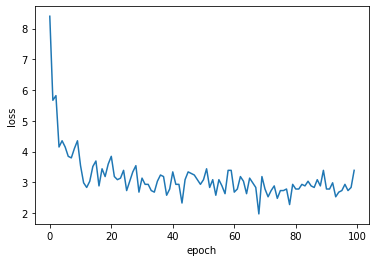

In [24]:
## 2. 손실 함수 누적값 확인하기

plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 04-7. 사이킷런으로 로지스틱 회귀 수행하기

#### 사이킷런으로 경사 하강법 적용하기

In [28]:
## 1. 로지스틱 손실 함수 지정하기

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter = 100, tol = 1e-3, random_state = 42)

In [29]:
## 2. 사이킷런으로 훈련하고 평가하기

sgd.fit(x_train, y_train)
sgd.score(x_test, y_t#est)

0.8333333333333334

In [30]:
## 3. 사이킷런으로 예측하기

sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])